## Glass Identification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
column = ["Id","RI","Na","Mg",'Al',"Si","K","Ca","Ba","Fe","Type of glass"]

df = pd.read_csv(r"C:\Users\HP\Downloads\Glass Identification.csv",names=column)
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 11)

In [4]:
df.drop_duplicates()   ## remove duplicate
print(df.shape)

(214, 11)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


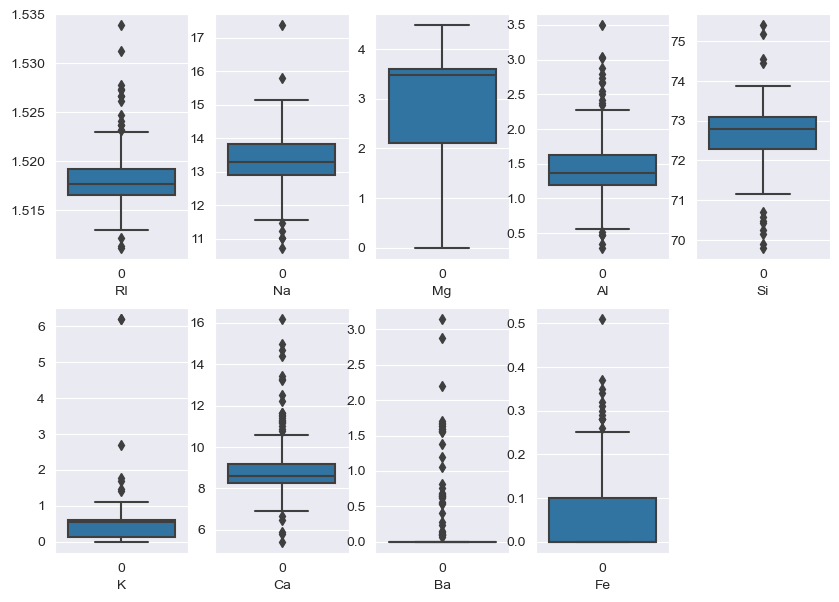

In [7]:
plt.figure(figsize=(10,7))
plot_num =1

for column in df.drop(["Id","Type of glass"],axis=1):
    if plot_num<=10:
        ax = plt.subplot(2,5,plot_num)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plot_num +=1
plt.show()

In [8]:
from scipy.stats import zscore

In [9]:
z = zscore(df.drop(["Id","Type of glass"],axis=1))
z.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [10]:
np.where(z>3)

(array([105, 106, 106, 106, 107, 107, 110, 111, 112, 112, 131, 145, 162,
        163, 163, 171, 171, 172, 172, 174, 184, 184, 189, 201, 201, 203,
        207, 213], dtype=int64),
 array([6, 0, 6, 7, 0, 6, 6, 6, 0, 6, 6, 8, 8, 3, 7, 3, 5, 3, 5, 8, 1, 4,
        7, 4, 5, 7, 7, 7], dtype=int64))

In [11]:
print(z.iloc[105,6])
print(z.iloc[106,0])

3.01659640155971
4.252673357413172


In [12]:
df = df[(z<3).all(axis=1)]
df.shape

(195, 11)

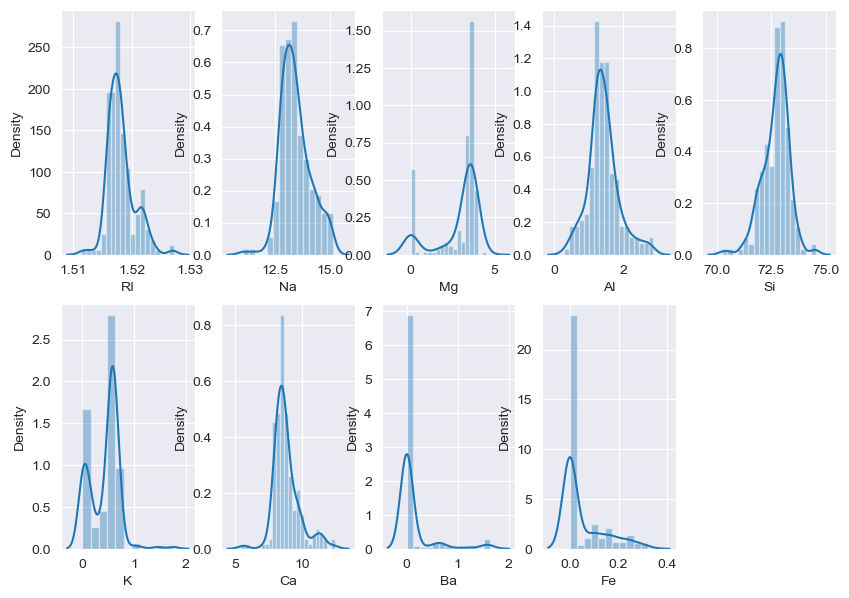

In [13]:
plt.figure(figsize=(10,7))
plot_num =1

for column in df.drop(["Id","Type of glass"],axis=1):
    if plot_num<=10:
        ax = plt.subplot(2,5,plot_num)
        sns.distplot(df[column],)
        plt.xlabel(column)
    plot_num +=1
plt.show()

In [14]:
df.drop("Id",axis=1,inplace=True)
df["Type of glass"] = np.where(df["Type of glass"]>4,0,1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
x = df.iloc[:,:-1]
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [16]:
y = df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int32

In [17]:
y.unique()

array([1, 0])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train :",x_train.shape)
print('x_test :',x_test.shape)
print("y_train :",y_train.shape)
print('y_test :',y_test.shape)

x_train : (156, 9)
x_test : (39, 9)
y_train : (156,)
y_test : (39,)


In [19]:
print(y_train.value_counts())

1    123
0     33
Name: Type of glass, dtype: int64


In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train,y_train = sm.fit_resample(x_train,y_train)
print("x_train shape",x_train.shape)
print("y_train shape:",y_train.shape)
print(y_train.value_counts())

x_train shape (246, 9)
y_train shape: (246,)
1    123
0    123
Name: Type of glass, dtype: int64


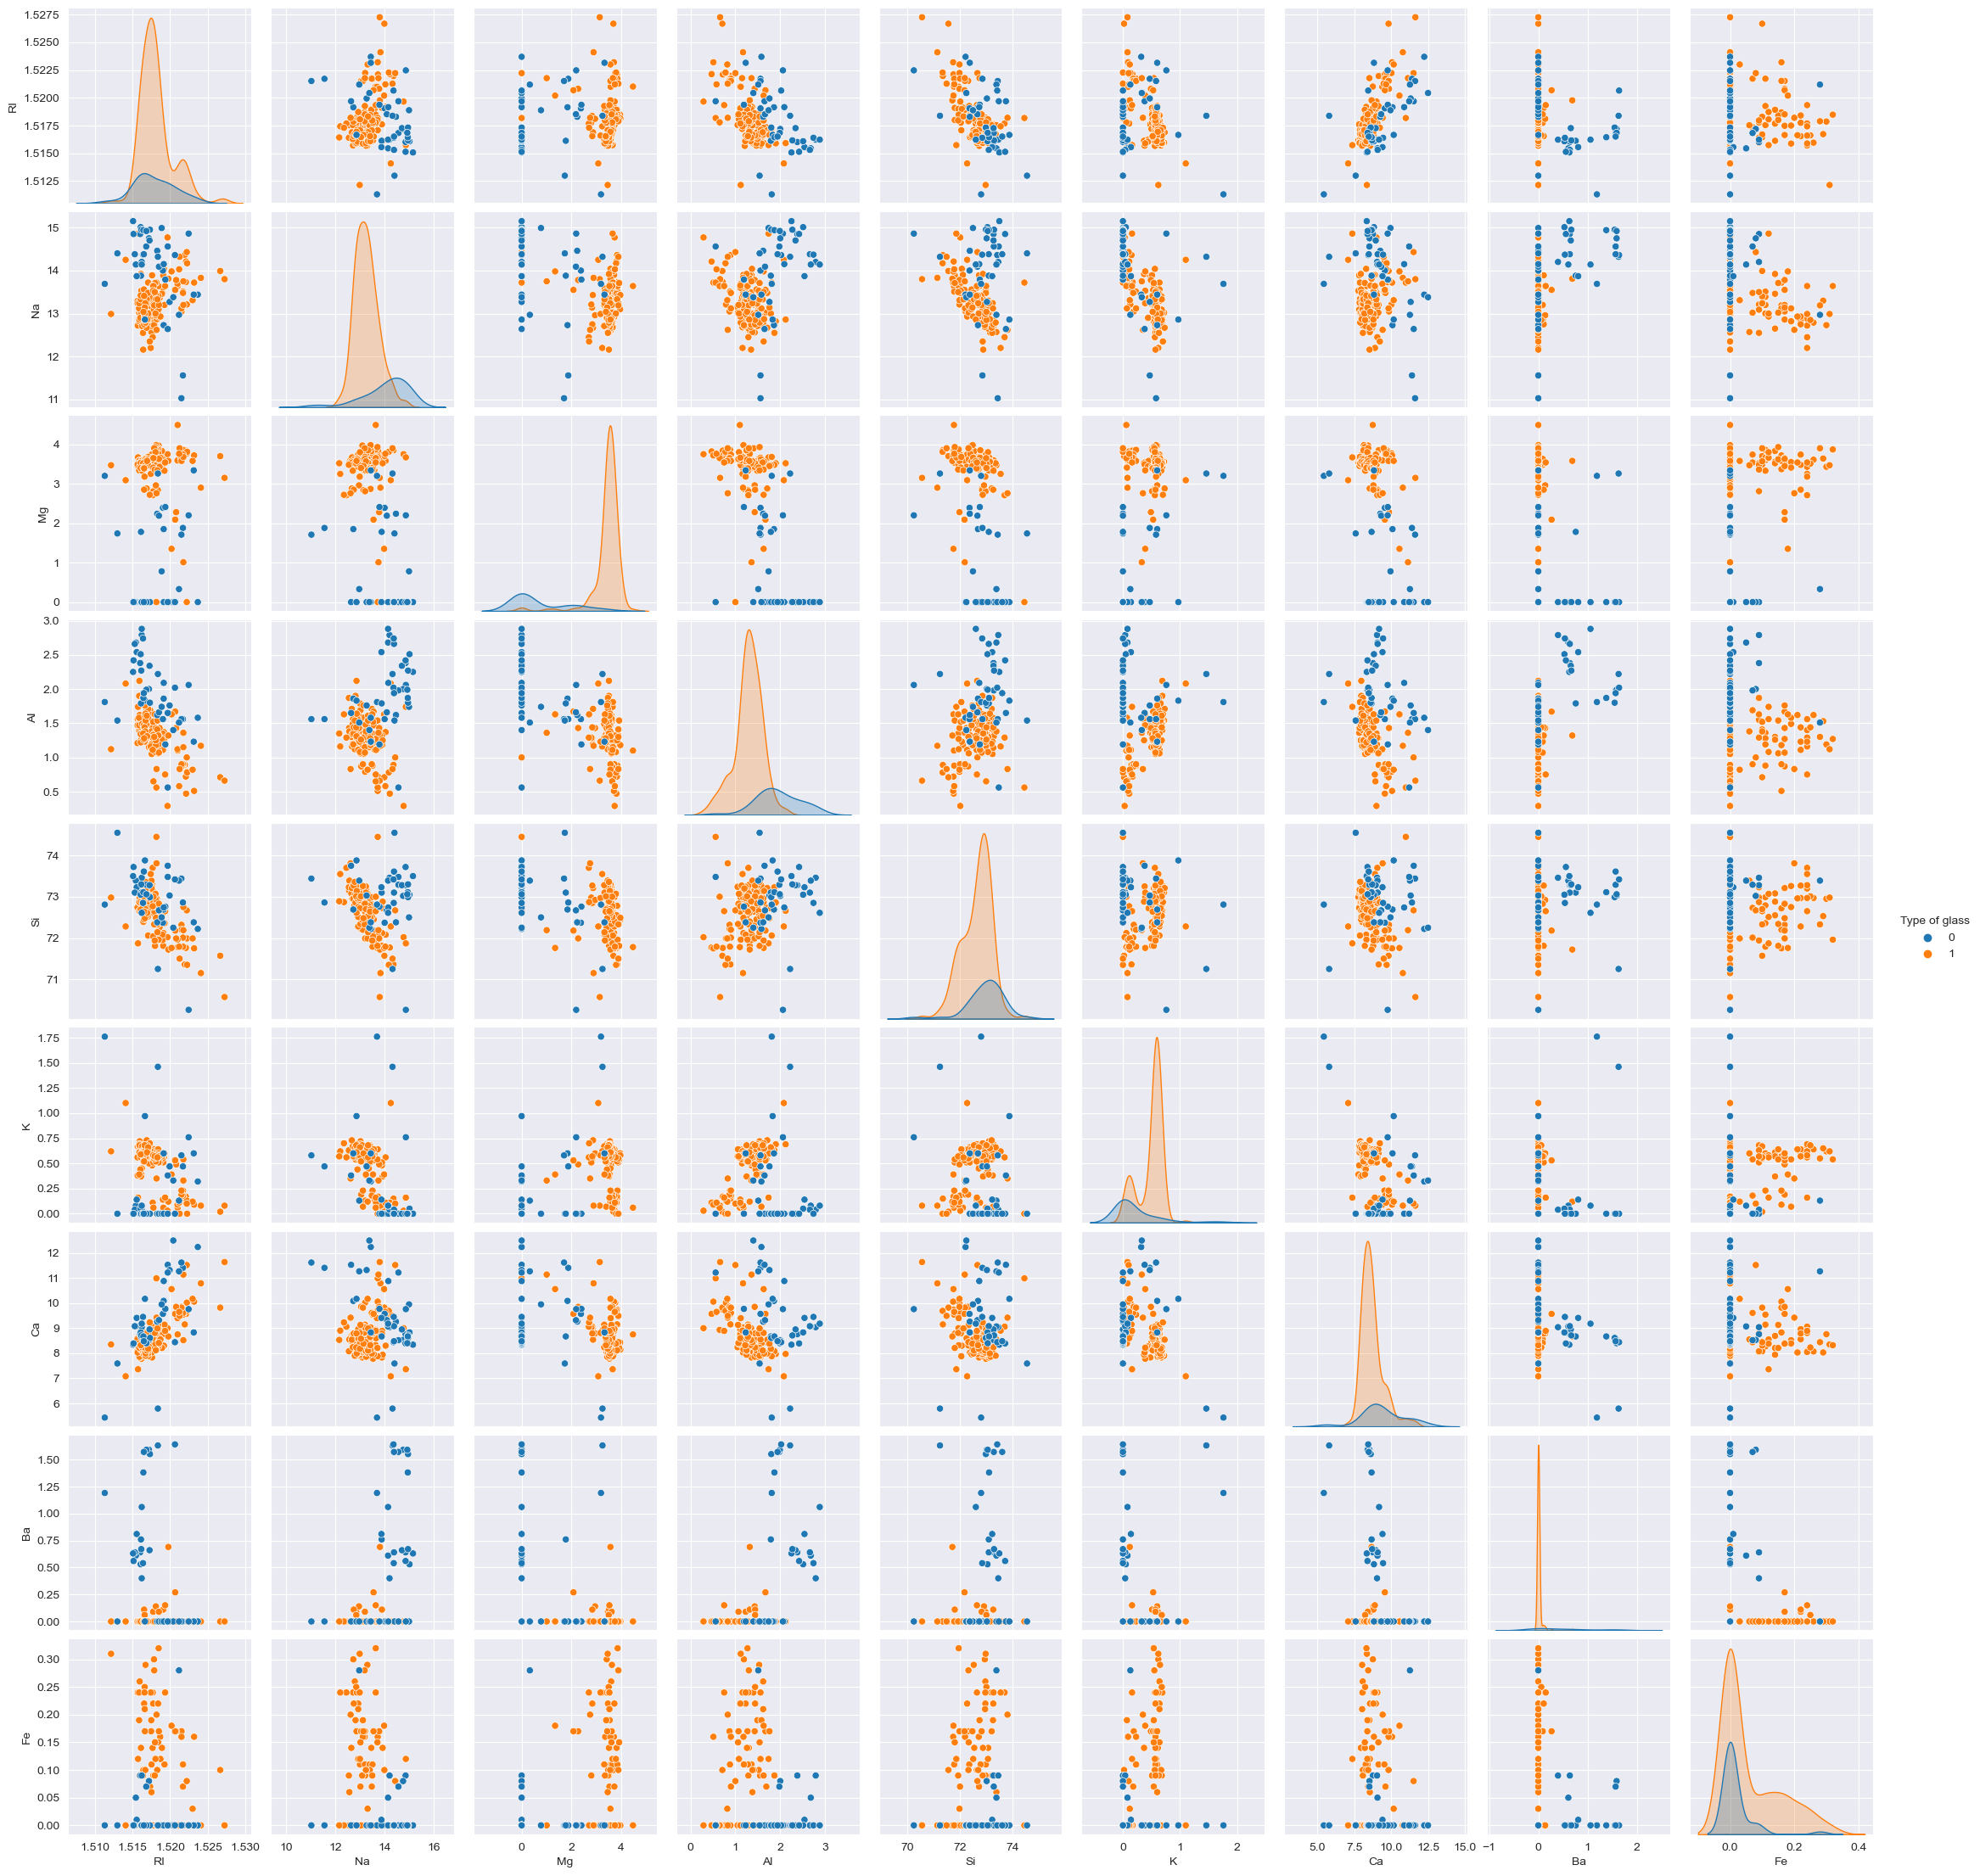

In [21]:
sns.pairplot(df,hue="Type of glass")

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [23]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred_test=lg.predict(x_test)
y_pred_train=lg.predict(x_train)

In [25]:
## train data accuracy

print("train data accuracy_score:",accuracy_score(y_train,y_pred_train))
print("train data confusion_matrix\n",confusion_matrix(y_train,y_pred_train))
print("\n train data classification_report\n",classification_report(y_train,y_pred_train))

train data accuracy_score: 0.959349593495935
train data confusion_matrix
 [[118   5]
 [  5 118]]

 train data classification_report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       123
           1       0.96      0.96      0.96       123

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



In [26]:
## test data accuracy

print("test data accuracy_score:",accuracy_score(y_test,y_pred_test))
print("test data confusion_matrix\n",confusion_matrix(y_test,y_pred_test))
print("\n test data classification_report\n",classification_report(y_test,y_pred_test))


y_pred_prob = lg.predict_proba(x_test)[:,1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

test data accuracy_score: 0.9230769230769231
test data confusion_matrix
 [[ 6  2]
 [ 1 30]]

 test data classification_report
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.94      0.97      0.95        31

    accuracy                           0.92        39
   macro avg       0.90      0.86      0.88        39
weighted avg       0.92      0.92      0.92        39

roc_auc score: 0.9919354838709677


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred_test=dtc.predict(x_test)
y_pred_train=dtc.predict(x_train)

In [30]:
## train data accuracy

print("train data accuracy_score:",accuracy_score(y_train,y_pred_train))
print("train data confusion_matrix\n",confusion_matrix(y_train,y_pred_train))
print("\n train data classification_report\n",classification_report(y_train,y_pred_train))

train data accuracy_score: 1.0
train data confusion_matrix
 [[123   0]
 [  0 123]]

 train data classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       123

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246



In [31]:
## test data accuracy

print("test data accuracy_score:",accuracy_score(y_test,y_pred_test))
print("test data confusion_matrix\n",confusion_matrix(y_test,y_pred_test))
print("\n test data classification_report\n",classification_report(y_test,y_pred_test))


y_pred_prob = dtc.predict_proba(x_test)[:,1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

test data accuracy_score: 0.9230769230769231
test data confusion_matrix
 [[ 7  1]
 [ 2 29]]

 test data classification_report
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.97      0.94      0.95        31

    accuracy                           0.92        39
   macro avg       0.87      0.91      0.89        39
weighted avg       0.93      0.92      0.92        39

roc_auc score: 0.905241935483871


In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [34]:
y_pred_test=mnb.predict(x_test)
y_pred_train=mnb.predict(x_train)

In [35]:
## train data accuracy

print("train data accuracy_score:",accuracy_score(y_train,y_pred_train))
print("train data confusion_matrix\n",confusion_matrix(y_train,y_pred_train))
print("\n train data classification_report\n",classification_report(y_train,y_pred_train))

train data accuracy_score: 0.8821138211382114
train data confusion_matrix
 [[ 97  26]
 [  3 120]]

 train data classification_report
               precision    recall  f1-score   support

           0       0.97      0.79      0.87       123
           1       0.82      0.98      0.89       123

    accuracy                           0.88       246
   macro avg       0.90      0.88      0.88       246
weighted avg       0.90      0.88      0.88       246



In [36]:
## test data accuracy

print("test data accuracy_score:",accuracy_score(y_test,y_pred_test))
print("test data confusion_matrix\n",confusion_matrix(y_test,y_pred_test))
print("\n test data classification_report\n",classification_report(y_test,y_pred_test))


y_pred_prob = mnb.predict_proba(x_test)[:,1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

test data accuracy_score: 0.9487179487179487
test data confusion_matrix
 [[ 6  2]
 [ 0 31]]

 test data classification_report
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.94      1.00      0.97        31

    accuracy                           0.95        39
   macro avg       0.97      0.88      0.91        39
weighted avg       0.95      0.95      0.95        39

roc_auc score: 0.9919354838709677


In [37]:
from sklearn.svm import SVC

In [38]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [39]:
y_pred_test=svc.predict(x_test)
y_pred_train=svc.predict(x_train)

In [40]:
## train data accuracy

print("train data accuracy_score:",accuracy_score(y_train,y_pred_train))
print("train data confusion_matrix\n",confusion_matrix(y_train,y_pred_train))
print("\n train data classification_report\n",classification_report(y_train,y_pred_train))

train data accuracy_score: 0.9186991869918699
train data confusion_matrix
 [[106  17]
 [  3 120]]

 train data classification_report
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       123
           1       0.88      0.98      0.92       123

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246



In [41]:
## test data accuracy

print("test data accuracy_score:",accuracy_score(y_test,y_pred_test))
print("test data confusion_matrix\n",confusion_matrix(y_test,y_pred_test))
print("\n test data classification_report\n",classification_report(y_test,y_pred_test))


#y_pred_prob = svc.predict_proba(x_test)[:,1] 
#print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

test data accuracy_score: 0.9230769230769231
test data confusion_matrix
 [[ 6  2]
 [ 1 30]]

 test data classification_report
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.94      0.97      0.95        31

    accuracy                           0.92        39
   macro avg       0.90      0.86      0.88        39
weighted avg       0.92      0.92      0.92        39



In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
y_pred_test=knn.predict(x_test)
y_pred_train=knn.predict(x_train)

In [45]:
## train data accuracy

print("train data accuracy_score:",accuracy_score(y_train,y_pred_train))
print("train data confusion_matrix\n",confusion_matrix(y_train,y_pred_train))
print("\n train data classification_report\n",classification_report(y_train,y_pred_train))

train data accuracy_score: 0.967479674796748
train data confusion_matrix
 [[121   2]
 [  6 117]]

 train data classification_report
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       123
           1       0.98      0.95      0.97       123

    accuracy                           0.97       246
   macro avg       0.97      0.97      0.97       246
weighted avg       0.97      0.97      0.97       246



In [46]:
## test data accuracy

print("test data accuracy_score:",accuracy_score(y_test,y_pred_test))
print("test data confusion_matrix\n",confusion_matrix(y_test,y_pred_test))
print("\n test data classification_report\n",classification_report(y_test,y_pred_test))


y_pred_prob = knn.predict_proba(x_test)[:,1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

test data accuracy_score: 1.0
test data confusion_matrix
 [[ 8  0]
 [ 0 31]]

 test data classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        31

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

roc_auc score: 1.0


In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parm_grid=({
    "n_neighbors" : [5,7,9,11,13],
    "weights"     : ["uniform", "distance"],
    "algorithm"   : ["auto", "ball_tree", "kd_tree", "brute"]
})

In [49]:
knn_cv = GridSearchCV(estimator=knn,param_grid=parm_grid,cv=5,scoring='f1')
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [50]:
knn_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [51]:
y_pred_test=knn_cv.predict(x_test)
y_pred_train=knn_cv.predict(x_train)

In [52]:
## train data accuracy

print("train data accuracy_score:",accuracy_score(y_train,y_pred_train))
print("train data confusion_matrix\n",confusion_matrix(y_train,y_pred_train))
print("\n train data classification_report\n",classification_report(y_train,y_pred_train))

train data accuracy_score: 1.0
train data confusion_matrix
 [[123   0]
 [  0 123]]

 train data classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       123

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246



In [53]:
## test data accuracy

print("test data accuracy_score:",accuracy_score(y_test,y_pred_test))
print("test data confusion_matrix\n",confusion_matrix(y_test,y_pred_test))
print("\n test data classification_report\n",classification_report(y_test,y_pred_test))


y_pred_prob = knn_cv.predict_proba(x_test)[:,1] 
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

test data accuracy_score: 1.0
test data confusion_matrix
 [[ 8  0]
 [ 0 31]]

 test data classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        31

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

roc_auc score: 1.0
